In [14]:

###############################################################################
#               Import part
###############################################################################
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import neighbors, model_selection
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
import sklearn.metrics.pairwise as pw 
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
import scipy
from sklearn import metrics
import random
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from tp_knn_source import (rand_gauss,rand_bi_gauss,rand_tri_gauss,
                           rand_clown,rand_checkers, plot_2d,frontiere_new,ErrorCurve,LOOCurve)

QUESTION 1 - Generation des donnés

from rand_bi_gauss

In [2]:
n1=20
n2=20 
mu1=[1, 1]
mu2=[-1, -1]
sigmas1=[0.9, 0.9]
sigmas2=[0.9, 0.9]
X1,y1 = rand_bi_gauss(n1,n2,mu1,mu2,sigmas1,sigmas2)

from rand_tri_gauss

In [3]:
n1=50
n2=50
n3=50
mu1=[1, 1]
mu2=[-1, -1]
mu3=[1, -1]
sigmas1=[0.9, 0.9]
sigmas2=[0.9, 0.9]
sigmas3=[0.9, 0.9]
X2,y2 =rand_tri_gauss(n1,n2,n3,mu1,mu2,mu3,sigmas1,sigmas2,sigmas3)

from rand_clown

In [4]:
n1=50
n2=50
sigmas1=1
sigmas2=5
X3,y3 = rand_clown(n1, n2, sigmas1, sigmas2)

from rand_checkers

In [5]:
n1=150
n2=150
sigma=0.1
X4,y4 = rand_checkers(n1, n2, sigma)

Ces fonctions renvoient des distributions Gausiennes de moyenne mu et d'ecart type sigma.

La dernière colonne correspond à l'etiquete, le label à  prédire.

QUESTION 2 - Utilisez la fonction plot_2d afin d’afficher les jeux de données générés avec chacune des fonctions.

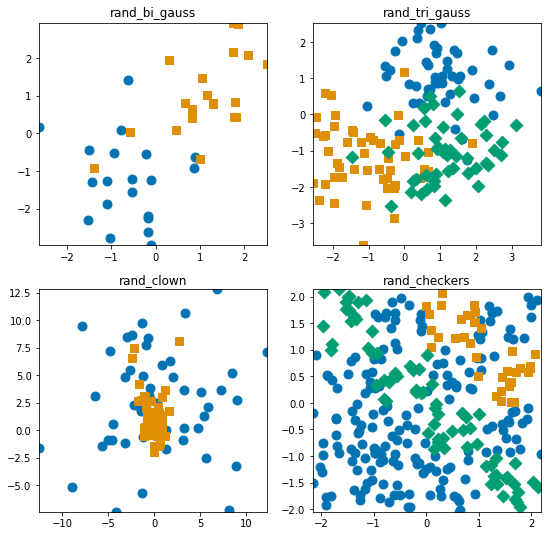

In [6]:
plt.figure(1, figsize=(9, 9))
plt.subplot(221)
plt.title('rand_bi_gauss')
plot_2d(X1, y1)
plt.subplot(222)
plt.title('rand_tri_gauss')
plot_2d(X2, y2)
plt.subplot(223)
plt.title('rand_clown')
plot_2d(X3, y3)
plt.subplot(224)
plt.title('rand_checkers')
plot_2d(X4, y4)
plt.show()

QUESTION 3

en régression k-NN, le résultat est la valeur pour cet objet. Cette valeur est la moyenne des valeurs des k plus proches voisins

ou encore


Pour le cas de la régression, quand les observations y sont à valeurs réelles, on associe à chaque groupe de k-voisins la moyenne de ces points.

QUESTION 4

comparaison de de mon implementation avec celui de scikit-learn

In [7]:
class KNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors=1):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_ = X
        self.y_ = y
        return self

    def predict(self,X, metric):
        n, n_features = X.shape
        # TODO : Compute all pairwise distances between X and self.X_
        D = pw.pairwise_distances(self.X_, X, metric=metric)
        
        pred = np.zeros(n)
        for i in range(n):
            k_closest = np.argsort(D[:,i])[:self.n_neighbors]
            pred[i] = scipy.stats.mode(self.y_[k_closest])[0][0]
        return pred
    
    def score(self, y):
        return np.sum(y==self.y_)*100/(len(self.y_))
    

Verification de la validilité des resultats

In [8]:
# calcul de prediction pour la classe KNeighborsClassifier codé manuellement
X2_train = X2[::2]
y2_train = y2[::2]
X2_test  = X2[1::2]
y2_test  = y2[1::2]

#knn = KNeighborsClassifier(n_neighbors=5)
knn = KNNClassifier(n_neighbors=5)
knn.fit(X2_train, y2_train)
manual_pred = knn.predict(X2_test,'euclidean')

In [ ]:
# calcul de la prediction pour la classe KNeighborsClassifier de scikit-learn

In [9]:
knn_sk = KNeighborsClassifier(n_neighbors=5)
knn_sk.fit(X2_train, y2_train)
scikit_pred = knn_sk.predict(X2_test)

In [44]:
# les deux methodes de calcul valident-elles les resultats?
all(manual_pred  == scikit_pred)

True

le resultat nous renvoie true, ce qui veut dire que les deux classifieurs nous donnent les memes predictions.
les resultats sont dont validés

QUESTION 5

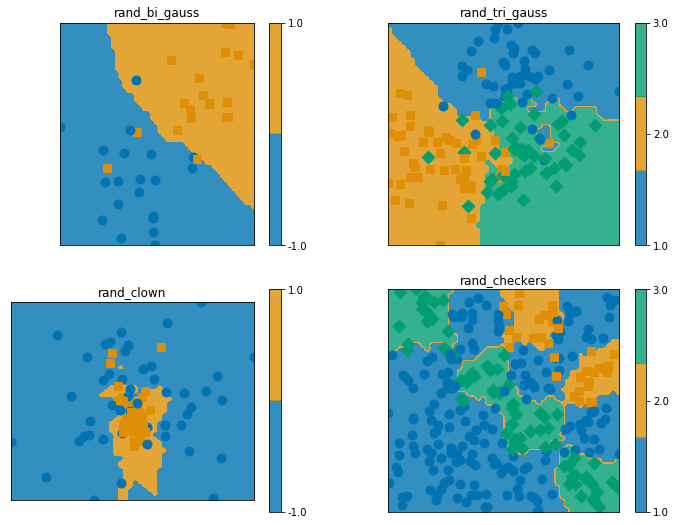

In [12]:
knn_sk = KNeighborsClassifier(n_neighbors=5)
def f(a):
    return knn_sk.predict(a.reshape(1,-1))
plt.figure(1, figsize=(12, 9))
knn_sk.fit(X1,y1)
plt.subplot(221)
plt.title('rand_bi_gauss')
frontiere_new(f, X1, y1)
knn_sk.fit(X2,y2)
plt.subplot(222)
plt.title('rand_tri_gauss')
frontiere_new(f, X2, y2)
knn_sk.fit(X3,y3)
plt.subplot(223)
plt.title('rand_clown')
frontiere_new(f, X3, y3)
knn_sk.fit(X4,y4)
plt.subplot(224)
plt.title('rand_checkers')
frontiere_new(f, X4, y4)
plt.show()


QUESTION 6

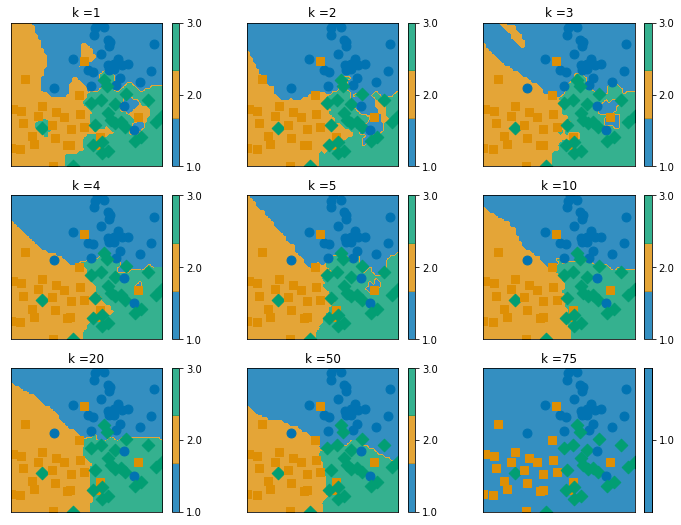

In [13]:
plt.figure(1, figsize=(12, 9))
list_1 = [1,2,3,4,5,10,20,50,75]
for index,k in enumerate(list_1):
    knn_sk = KNeighborsClassifier(n_neighbors=k)
    knn_sk.fit(X2[::2],y2[::2])
    plt.subplot(int('33' +str(index+1)))
    plt.title('k ='+str(k))
    frontiere_new(f, X2[::2], y2[::2])

affichage de données lorsque k = 1 et k = n

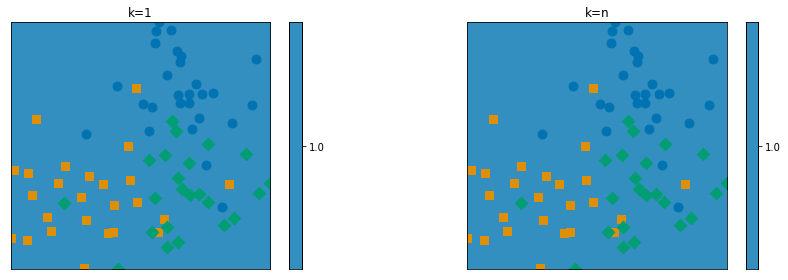

In [14]:
plt.figure(1, figsize=(15, 10))

knn_sk.fit(X2[::2],y2[::2])
plt.subplot(221)
plt.title('k=1')
frontiere_new(f, X2[::2],y2[::2])
knn_sk = KNeighborsClassifier(n_neighbors=75)
knn_sk.fit(X2[::2],y2[::2])
plt.subplot(222)
plt.title('k=n')
frontiere_new(f,X2[::2],y2[::2])

In [15]:
def weight_func(dist):
    
    """ Weight function to replace lambda d: d ** -2.
    The lambda function is not valid because:
    if d==0 then 0^-2 is not valid. """


    return np.exp(-(dist**2)/h)

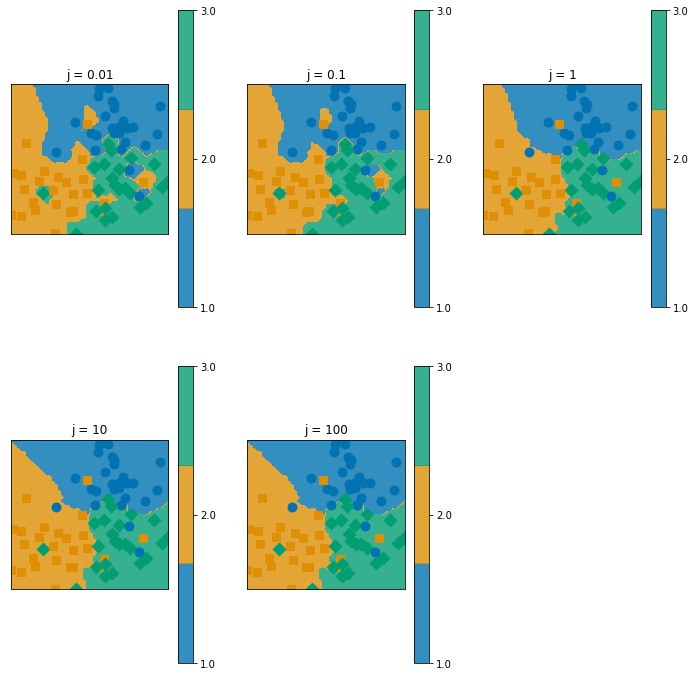

In [16]:
plt.figure(figsize=(12,12))
for i in [-2,-1,0,1,2]:
    plt.subplot(231+[-2,-1,0,1,2].index(i))
    h = 10**i
    knn_sk = KNeighborsClassifier(n_neighbors=7,weights= weight_func)
    knn_sk.fit(X2[::2],y2[::2])
    plt.title("j = "+ str(h))
    frontiere_new(f, X2[::2],y2[::2])
    
    

nous observons une fois de plus que lorsque j est faible, on est en surapprentissage.

QUESTION 8

In [17]:
# taux d’erreur sur les mêmes données d’apprentissage,  k = 1
knn_sk2 = KNeighborsClassifier(n_neighbors= 1)
knn_sk2.fit(X2[::2], y2[::2])
taux_erreur0 = 1 - accuracy_score(knn_sk2.predict(X2[::2]),y2[::2])

# taux d’erreur sur les mêmes données de test
taux_erreur1 = 1 - accuracy_score(knn_sk2.predict(X2[1::2]),y2[1::2])

print(f"le taux d'erreur sur les données d'apprentissage est de {taux_erreur0}")
print(f"le taux d'erreur sur les données de test est {taux_erreur1}")

le taux d'erreur sur les données d'apprentissage est de 0.0
le taux d'erreur sur les données de test est 0.21333333333333337


C'est logique que l'erreur soit nulle sur les données d'apprentissage puisque le plus proche voisin est la donnée elle même.

QUESTION 9

Text(0, 0.5, 'taux erreur')

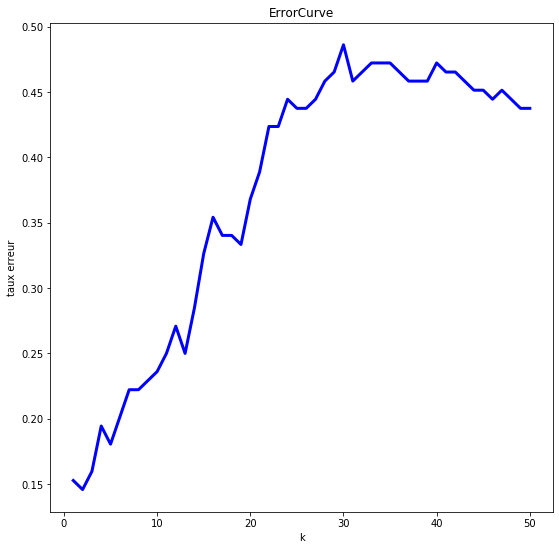

In [18]:
# tracez le taux d’erreur en fonction de k pour k = 1, 2, . . . , 50.
# taux d’erreur sur les mêmes données d’apprentissage,  k = 1
list_k =[]
for k in range(1,51):
    knn_sk2 = KNeighborsClassifier(n_neighbors= k)
    knn_sk2.fit(X4[::2], y4[::2])
    taux_erreur = 1 - accuracy_score(knn_sk2.predict(X4[1::2]),y4[1::2])
    list_k.append(taux_erreur)

l = [v for v in range(1,51)]
plt.figure(figsize=(9,9))
plt.plot(l,list_k,c='blue',lw=3)
plt.title('ErrorCurve')
plt.xlabel('k')
plt.ylabel('taux erreur')

In [ ]:
avec la classe ErrorCurve

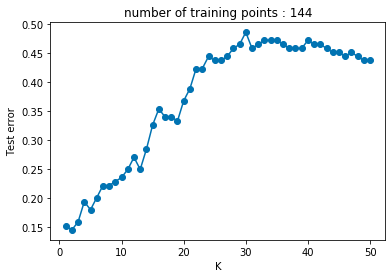

In [19]:
rate_erros = ErrorCurve(k_range=range(1,51))
rate_erros.fit_curve(X4[::2],y4[::2],X4[1::2],y4[1::2])
rate_erros.plot()

QUESTION 10

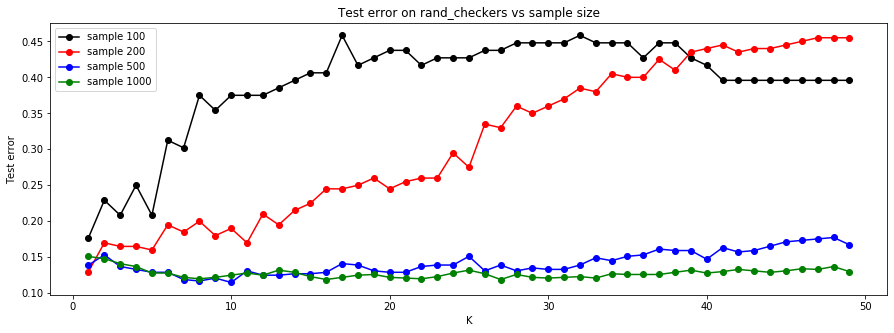

In [20]:
sample_size = [100, 200, 500, 1000]
plt.figure(figsize=(15,5))
color_list = ['k', 'r', 'b', 'g']
i = 0
for n in sample_size[::]:
    
    # generate the rand_checkers sample
    X4,y4 = rand_checkers(n, n, 0.1)
    
    # split it into a training and a test samples
    X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.5, random_state=42)
    
    # plot the errors
    k_range = range(1,50)
    curve = ErrorCurve(k_range = k_range)
    curve.fit_curve(X4_train, y4_train, X4_test, y4_test)
    label = "sample " + str(n)
    curve.plot(label = label, color = color_list[i])
    plt.title('Test error on rand_checkers vs sample size')
    plt.legend()
    i = i + 1

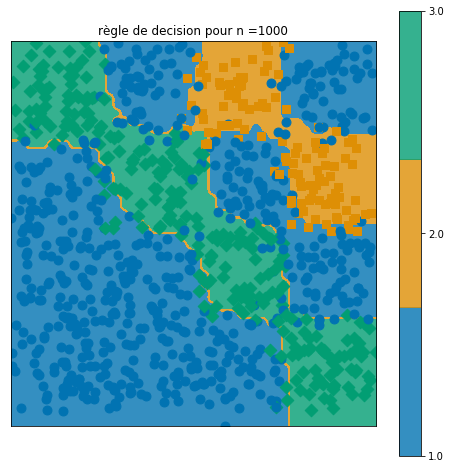

In [21]:
n = 1000
plt.figure(figsize=(18,18))

# generate the rand_checkers sample
X4,y4 = rand_checkers(n, n, 0.1)
    
# split it into a training and a test samples
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.5, random_state=42)
    
# plot the errors

knn_sk = KNeighborsClassifier(n_neighbors= 30)
def f(a):
    return knn_sk.predict(a.reshape(1,-1))
knn_sk.fit(X4_train,y4_train)
plt.subplot(221)
plt.title('règle de decision pour n =1000')
frontiere_new(f,X4_train,y4_train)

AVANTAGES DU MODÈLE
- Simplicité, pas d’apprentissage d’un modèle (lazy learning)
- Incrémentalité (l'algorithme garde à disposition les individus de la base)
- Bonnes performances en général(temp de calcul rapide)
- Err(1-ppv) < 2 ** Err(Modèle bayesien idéal)

INCONVENIENTS

- Paramétrage difficile (choix de la taille du voisinage)
- Impossibilité d’interprétation d’un classement proposé.
- Des problèmes d’échelle lorsque la  distance euclidienne est utilisée
- Paramétrage difficile (choix de la taille du voisinage n'est pas aisé)
- Nécessité de garder sous la main la base de données
- Lenteur en classement (passage en revue de tous les individus de la base)
- Sensibilité à la dimensionnalité (et aux variables non pertinentes)

QUESTION 12

In [ ]:
Description du DIGITS dataset


Recognizing hand-written digits

An example showing how the scikit-learn can be used to recognize images of
hand-written digits.

This example is commented in the
:ref:`tutorial section of the user manual <introduction>`.


Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
  

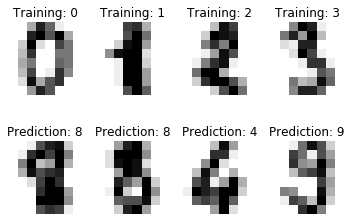

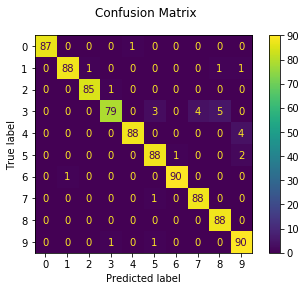

In [22]:
run plot_digits_classification

Histogramme pour les classe

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

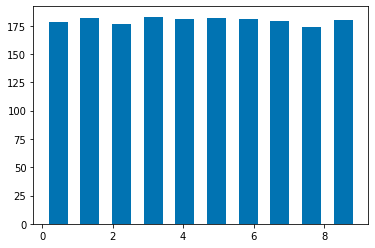

In [24]:
plt.hist(digits.target,rwidth= 0.6)

Split de l’échantillon en deux parties de même taille et calcul du taux d'erreur

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

Calcul du taux d'erreur

In [26]:
y_train.shape
knn_sk = KNeighborsClassifier(n_neighbors= 30)
knn_sk.fit(X_train,y_train)
predict = knn_sk.predict(X_test)
taux_erreur = 1 - accuracy_score(predict,y_test)
print(f"le taux d'erreur est de {taux_erreur}")

le taux d'erreur est de 0.07452725250278092


QUESTION 13

 l'estimation de la matrice de confusion est de [[87  0  0  0  1  0  0  0  0  0]
 [ 0 82  5  1  0  1  0  0  0  2]
 [ 1  0 79  6  0  0  0  0  0  0]
 [ 0  0  0 81  0  3  0  4  1  2]
 [ 2  0  0  0 87  0  0  2  1  0]
 [ 0  0  0  0  0 85  3  0  0  3]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  1  0  0  0  0 88  0  0]
 [ 0  6  1  6  0  4  1  1 68  1]
 [ 1  0  0  4  0  2  0  0  1 84]]


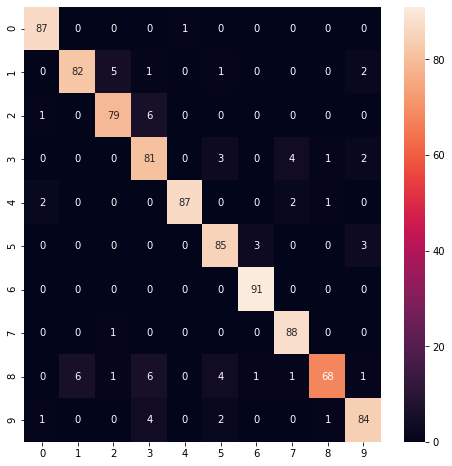

In [31]:
# estimation de la matrice de confusion
confusion_matrix = metrics.confusion_matrix(y_test,predict)
print(f" l'estimation de la matrice de confusion est de {confusion_matrix}")

# visualtion de la matrice

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True)

QUESTION 14

In [32]:
# méthode pour choisir k 
score = LOOCurve(k_range=[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 100, 200])
score.fit_curve(data,digits.target)

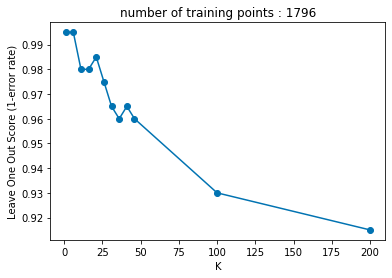

In [33]:
score.plot()

QUESTION 15

In [6]:
%%latex
$$ P \{ Y = k | X = x \} = \frac {P\{X = x| Y = k\}.P\{Y=k\}}{P\{X = x\}} $$

$$$$$$$$
$$ P \{ Y = +1 | X = x \} = \frac {f_{+}.\pi_{+}}{f_{+}.\pi_{+}+f_{-}.(1-\pi_{+})} $$

$$$$$$$$
$$ P \{ Y = -1 | X = x \} = \frac {f_{-}.(1-\pi_{+})}{f_{+}.\pi_{+}+f_{-}.(1-\pi_{+})} $$

<IPython.core.display.Latex object>

QUESTION 16

In [12]:
%%latex
$$\begin{align}log\left(\frac {P \{ Y = +1 | X = x \}}{ P \{ Y = -1 | X = x \}}\right)= 
log(\frac{f_{+}.\pi_{+}}{f_{-}.(1-\pi_{+})})\end{align}$$

$$$$$$$$
\begin{align} 
log \left( \frac {P \{ Y = +1 | X = x \}}{ P \{ Y = -1 | X = x \}} \right) &=
log\left(\frac{\pi_{+}}{1-\pi_{+}}\right)\cdot\left(-\frac{1}{2}.(x − μ_{+})^T Σ^{-1}  (x − μ_{+})+\frac{1}{2}(x − μ_{-})^T Σ^{-1} (x − μ_{-}\right)\\
&=
log\left(\frac{\pi_{+}}{1-\pi_{+}}\right)\cdot\left(x^T.Σ^{-1}(μ_{+}-μ_{-})-\frac{1}{2}μ_{+}^T Σ^{-1}μ_{+}+\frac{1}{2}μ_{-}^T Σ^{-1}μ_{-}\right)\\
\end{align}

<IPython.core.display.Latex object>

QUESTION 17

In [13]:
%%latex
On choisit le classifieur:
\begin{equation}
\left\lbrace
\begin{array}{c}
1 & si & {P \{ Y = +1 | X = x \}}>{ P \{ Y = -1 | X = x \}}\\
-1 & sinon
\end{array}\right.
\end{equation}
$$$$
\begin{equation}
\left\lbrace
\begin{array}{c}
1 & si & log\left(\frac{\hat{\pi}_{+}}{1-\hat{\pi}_{+}}\right)\cdot\left(x^T.\hat{Σ}^{-1}(\hat{μ}_{+}-\hat{μ}_{-})-\frac{1}{2}\hat{μ}_{+}^T \hat{Σ}^{-1}\hat{μ}_{+}+\frac{1}{2}\hat{μ}_{-}^T \hat{Σ}^{-1}\hat{μ}_{-}\right)>0\\
-1 & sinon
\end{array}\right.
\end{equation}
$$$$
\begin{equation}
\left\lbrace
\begin{array}{c}
1 & si & log\left(\frac{\frac{m}{n}}{1-\frac{m}{n}}\right)\cdot\left(x^T.\hat{Σ}^{-1}(\hat{μ}_{+}-\hat{μ}_{-})-\frac{1}{2}\hat{μ}_{+}^T \hat{Σ}^{-1}\hat{μ}_{+}+\frac{1}{2}\hat{μ}_{-}^T \hat{Σ}^{-1}\hat{μ}_{-}\right)>0\\
-1 & sinon
\end{array}\right.
\end{equation}
$$$$
\begin{equation}
\left\lbrace
\begin{array}{c}
1 & si & 
x^T.\hat{Σ}^{-1}(\hat{μ}_{+}-\hat{μ}_{-})>
\frac{1}{2}\hat{μ}_{+}^T \hat{Σ}^{-1}\hat{μ}_{+}-\frac{1}{2}\hat{μ}_{-}^T \hat{Σ}^{-1}\hat{μ}_{-}
- log\left(\frac{m}{n}\right) + log \left({1-\frac{m}{n}}\right)\\
-1 & sinon
\end{array}\right.
\end{equation}


<IPython.core.display.Latex object>

QUESTION 18

In [39]:
class LDAClassifier():

    def fit(self, X, y):
        m = list(y).count(1)
        n = len(y)
        index_p = [i for i, e in enumerate(y) if e == 1]
        index_n = [i for i, e in enumerate(y) if e == -1]
        self.mu_chap_p = 1/m * \
            np.sum(np.array([X[i] for i in index_p]), axis=0).T
        self.mu_chap_n = 1 / \
            (n-m)*np.sum(np.array([X[i] for i in index_n]), axis=0).T
        X_p = np.array([X[i] for i in index_p])
        X_n = np.array([X[i] for i in index_n])
        sigma_p = 1/(m-1)*(X_p-self.mu_chap_p).T@(X_p-self.mu_chap_p)
        sigma_n = 1/(n-m-1)*(X_n-self.mu_chap_n).T@(X_n-self.mu_chap_n)
        self.sigma = 1/(n-2)*((m-1)*sigma_p+(n-m-1)*sigma_n)

        self.thresh = 1/2*(self.mu_chap_p @ np.linalg.inv(self.sigma) @self.mu_chap_p.T - self.mu_chap_n @
                           np.linalg.inv(self.sigma) @self.mu_chap_n.T) + np.math.log(1-m/n)-np.math.log(m/n)

    
    def _predict_(self, x):
        if x.T @ np.linalg.inv(self.sigma) @ (self.mu_chap_p - self.mu_chap_n) > self.thresh:
            return 1
        elif x.T @ np.linalg.inv(self.sigma) @ (self.mu_chap_p - self.mu_chap_n) < self.thresh:
            return -1
        else:
            return random.sample([-1, 1], 1)[0]
    
    def predict(self, X):
        return list(map(self._predict_, X))
    
    def score(self, X,y):
        return np.mean(self.predict(X)==y)

QUESTION 19

In [ ]:
Vérification des resultats

In [58]:
# split du dataset
# 20% pour l'echantillon d'apprentissage et 80% pour l'échantillon test
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.7, random_state=1)

# calcul de prediction pour la LDA codé manuellement
my_LDAClassifier = LDAClassifier()
my_LDAClassifier.fit(X3_train, y3_train)
my_LDA_predict = my_LDAClassifier.predict(X3_test)

# calcul de la prediction pour la LDA de scikit-learn
sk_LDAClassifier = LinearDiscriminantAnalysis()
sk_LDAClassifier.fit(X3_train, y3_train)
LDA_scikit_predict = sk_LDAClassifier.predict(X3_test)

# les deux methodes de calcul valident-elles les resultats?
all(my_LDA_predict == LDA_scikit_predict)

# Taux d'erreur LDAClassifier
my_LDA_errors = my_LDAClassifier.score(X3_test,y3_test)

# Taux d'erreur LinearDiscriminantAnalysis 
scikit_LDA_errors = sk_LDAClassifier.score(X3_test,y3_test)

# nombres de fois ou les prédictions coincident
nbre_cas =  str(len(X3_test[np.equal(my_LDA_predict,LDA_scikit_predict)]))

# nombre total de prediction 
nbre_total_prediction = len(X3_test)

# nbre de similutudes
nbre_similitude = len(X3_test[np.equal(my_LDA_predict,LDA_scikit_predict)]) / len(X3_test) * 100

print(all(my_LDA_predict == LDA_scikit_predict))
print(f"Nombre de cas où les predictions coincident: {nbre_cas}")
print('Nombre total de prediction :' + str(nbre_total_prediction) + '.\n Il y a donc une similitude de ' 
      + str(nbre_similitude)+ "% dans la prédiction entre ces deux methodes de calcul" )


True
Nombre de cas où les predictions coincident: 112000
Nombre total de prediction :112000.
 Il y a donc une similitude de 100.0% dans la prédiction entre ces deux methodes de calcul


In [ ]:
# regle de decision
my_LDAClassifier = LinearDiscriminantAnalysis()
def f(a):
    return my_LDA_predict(a.reshape(1,-1))
sk_LDAClassifier.fit(X3_train,y3_train)
#plot_2d(X3_train, y3_train)
plt.subplot(221)
plt.title('règle de decision pour LDA')
frontiere_new(f,X3_train,y3_train)

QUESTION 20

In [ ]:
# visualisez la règle de classification pour les jeux de données
#1 et #3

QUESTION 21

In [79]:
# application de la classification par la regression logistique
n1=55
n2=5
mu1=[1, 1]
mu2=[-1, -1]
sigmas1=[0.2, 0.9]
sigmas2=[0.9, 0.5]
X5,y5= rand_bi_gauss(n1,n2,mu1,mu2,sigmas1,sigmas2)
logistic = LogisticRegression(solver ='lbfgs')
logistic.fit(X5,y5)


# comparaison avec la LDA
logistic_score = logistic.score(X5,y5)
LDA_score = my_LDAClassifier.score(X5,y5)
print(f"le score avec la regression logistique est de {logistic_score}")
print(f"le score avec la LDA est  {LDA_score}")

le score avec la regression logistique est de 0.9666666666666667
le score avec la LDA est  0.9666666666666667


QUESTION 22

In [80]:
print(logistic.coef_)
print(logistic.intercept_)

[[1.66560553 1.10315688]]
[1.17033691]


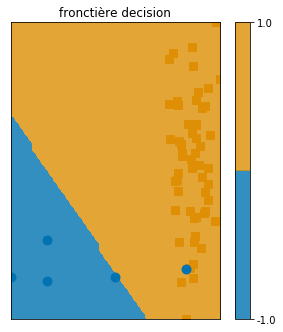

In [85]:
#frontière de décision.
logistic = LogisticRegression(solver ='lbfgs')
def f(a):
    return logistic.predict(a.reshape(1,-1))
plt.figure(1, figsize=(12, 12))
logistic.fit(X5,y5)
plt.subplot(221)
plt.title('fronctière decision')
frontiere_new(f, X5, y5)

In [88]:
X_train = digits.data[:n_samples // 2]
y_train = digits.target[:n_samples // 2]
X_test = digits.data[n_samples // 2:]
y_test = digits.target[n_samples // 2:]
logr = LogisticRegression(solver ='lbfgs')
logr.fit(X_train,y_train)
digits_score = logr.score(X_test,y_test)
print(f"taux d'erreur avec l'utilisation des données de la base digits est de {1-digits_score}")

taux d'erreur avec l'utilisation des données de la base digits est de 0.07007786429365959


/home/dell/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
